<a href="https://colab.research.google.com/github/pingstech/ZeroToHero-ML/blob/main/12_MachineLearning_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import files
file_id = "1OBNQ9iayRBeXf3dI1datIauDZF6EbTxV" 
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("column_2C_weka.csv")

In [ ]:
#------------ IMPORT LIBRARIES ------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#------------ READING CSV FILE ------------
df=pd.read_csv("column_2C_weka.csv",sep=",")

In [ ]:
#------------ FIRST AND LAST 5 FEATURES ------------
print(df.head())
print("**********************************************************************************")
print(df.tail())

   pelvic_incidence  pelvic_tilt numeric  ...  degree_spondylolisthesis     class
0         63.027818            22.552586  ...                 -0.254400  Abnormal
1         39.056951            10.060991  ...                  4.564259  Abnormal
2         68.832021            22.218482  ...                 -3.530317  Abnormal
3         69.297008            24.652878  ...                 11.211523  Abnormal
4         49.712859             9.652075  ...                  7.918501  Abnormal

[5 rows x 7 columns]
**********************************************************************************
     pelvic_incidence  pelvic_tilt numeric  ...  degree_spondylolisthesis   class
305         47.903565            13.616688  ...                 -4.245395  Normal
306         53.936748            20.721496  ...                 -0.421010  Normal
307         61.446597            22.694968  ...                 -2.707880  Normal
308         45.252792             8.693157  ...                  0.214750  

In [ ]:
#------------ DATA INFO ------------
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB
None


In [ ]:
#------------ DATA INFO(STATISTICS) ------------
print(df.describe())

       pelvic_incidence  ...  degree_spondylolisthesis
count        310.000000  ...                310.000000
mean          60.496653  ...                 26.296694
std           17.236520  ...                 37.559027
min           26.147921  ...                -11.058179
25%           46.430294  ...                  1.603727
50%           58.691038  ...                 11.767934
75%           72.877696  ...                 41.287352
max          129.834041  ...                418.543082

[8 rows x 6 columns]


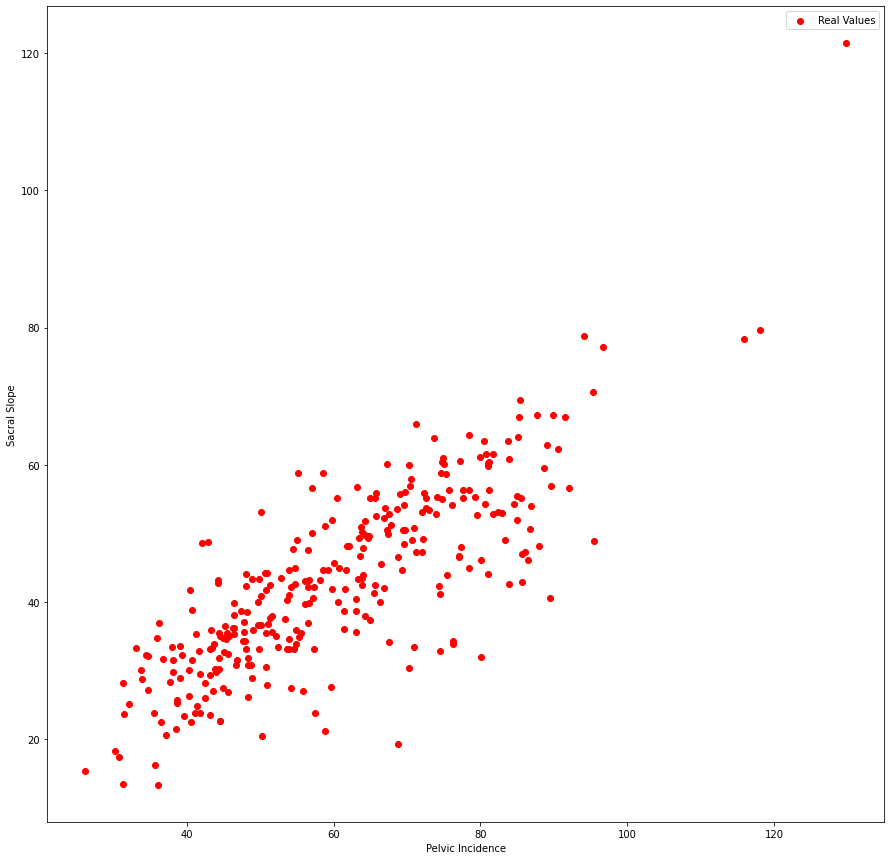

In [ ]:
#------------ VISUALISATION ------------
plt.figure(figsize=[15,15])
plt.scatter(df.pelvic_incidence,df.sacral_slope,color="red",label="Real Values")
plt.legend()
plt.xlabel("Pelvic Incidence")++
plt.ylabel("Sacral Slope")
plt.show()

In [ ]:
#------------ LINEAR REGRESSION ------------
from sklearn.linear_model import LinearRegression
x=df.pelvic_incidence.values.reshape(-1,1)
y=df.sacral_slope.values.reshape(-1,1)
lr_df=LinearRegression()
lr_df.fit(lr_x,lr_y)
lr_yhead=lr_df.predict(lr_x)
b0=float(lr_df.intercept_)
b1=float(lr_df.coef_)
print("b0:",b0)
print("b1:",b1)
print("Predict for Linear Regression:",(b0+(b1*41)))

b0: 4.559161366152871
b1: 0.6346577494130067
Predict for Linear Regression: 30.580129092086146


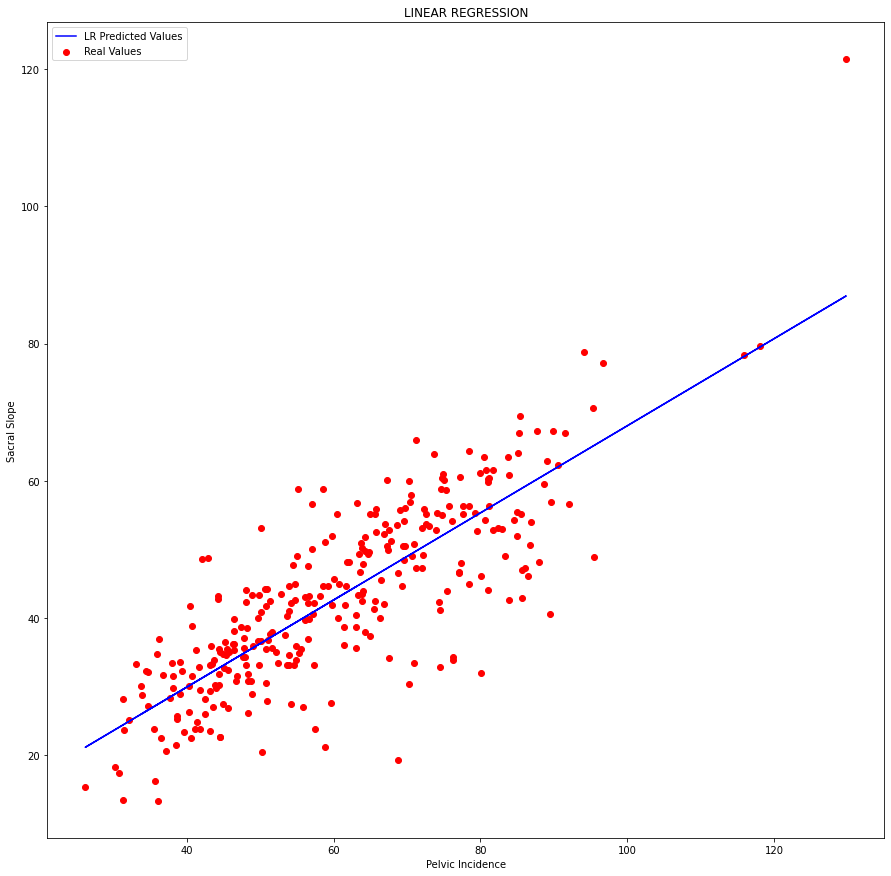

In [ ]:
#------------ LINEAR REGRESSION VISUALISATION ------------
plt.figure(figsize=[15,15])
plt.scatter(x,y,color="red",label="Real Values")
plt.plot(x,lr_yhead,color="blue",label="LR Predicted Values")
plt.title("LINEAR REGRESSION")
plt.xlabel("Pelvic Incidence")
plt.ylabel("Sacral Slope")
plt.legend()
plt.show()

In [ ]:
#------------ LINEAR REGRESSION r^2 Score ------------
from sklearn.metrics import r2_score
print("The r^2 score for Linear Regression:",r2_score(y,lr_yhead))

The r^2 score for Linear Regression: 0.664159783972475


In [ ]:
#------------ MULTIPLE LINEAR REGRESSION ------------
from sklearn.linear_model import LinearRegression
mlr_x=df.iloc[:,[0,2]].values
y=df.pelvic_incidence.values.reshape(-1,1)
mlr_df=LinearRegression()
mlr_df.fit(mlr_x,y)
mlr_yhead=mlr_df.predict(mlr_x)
print("b0: ",mlr_df.intercept_)
print("b1 and b2: ",mlr_df.coef_)
print("Predict for Multiple Linear Regression",np.array([[41,28],[2,4]]))

b0:  [7.10542736e-15]
b1 and b2:  [[1.00000000e+00 6.84858774e-17]]
Predict for Multiple Linear Regression [[41 28]
 [ 2  4]]


In [ ]:
#------------ MULTIPLE LINEAR REGRESSION r^2 Score ------------
from sklearn.metrics import r2_score
print("The r^2 score for Multiple Linear Regression:",r2_score(y,mlr_yhead))

The r^2 score for Multiple Linear Regression: 1.0


In [ ]:
#------------ POLYNOMIAL LINEAR REGRESSION ------------
from sklearn.preprocessing import PolynomialFeatures
plr_df=PolynomialFeatures(degree=2)
plr_x=plr_df.fit_transform(x)

from sklearn.linear_model import LinearRegression
plrLR_df=LinearRegression()
plrLR_df.fit(plr_x,y)
plr_yhead=plrLR_df.predict(plr_x)

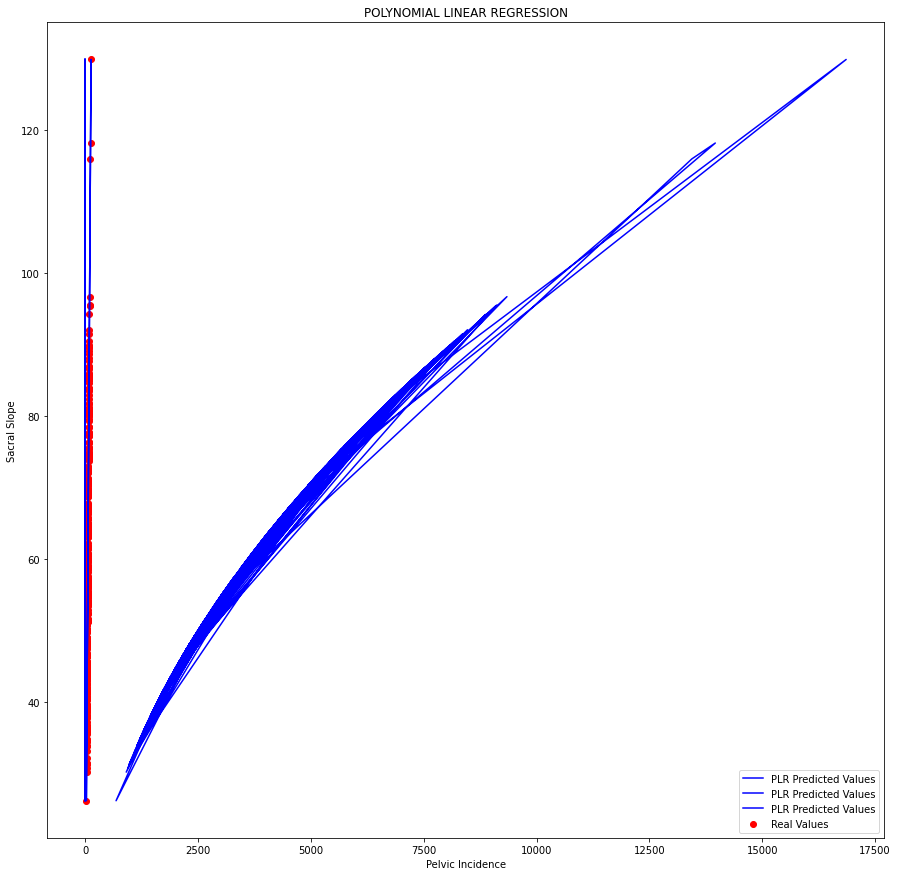

In [ ]:
#------------ POLYNOMIAL LINEAR REGRESSION VISUALISATION ------------
plt.figure(figsize=[15,15])
plt.scatter(x,y,color="red",label="Real Values")
plt.plot(plr_x,plr_yhead,color="blue",label="PLR Predicted Values")
plt.title("POLYNOMIAL LINEAR REGRESSION")
plt.xlabel("Pelvic Incidence")
plt.ylabel("Sacral Slope")
plt.legend()
plt.show()

In [ ]:
#------------ POLYNOMIAL LINEAR REGRESSION r^2 Score ------------
from sklearn.metrics import r2_score
print("The r^2 score for Polynomial Linear Regression:",r2_score(y,plr_yhead))

The r^2 score for Polynomial Linear Regression: 1.0


In [ ]:
#------------ DECISION TREE REGRESSION ------------
from sklearn.tree import DecisionTreeRegressor
x=df.pelvic_incidence.values.reshape(-1,1)
y=df.sacral_slope.values.reshape(-1,1)
dtr_df=DecisionTreeRegressor()
dtr_df.fit(x,y)
dtr_x=np.arange(min(x),max(x),0.01).reshape(-1,1)
dtr_yhead=dtr_df.predict(dtr_x)

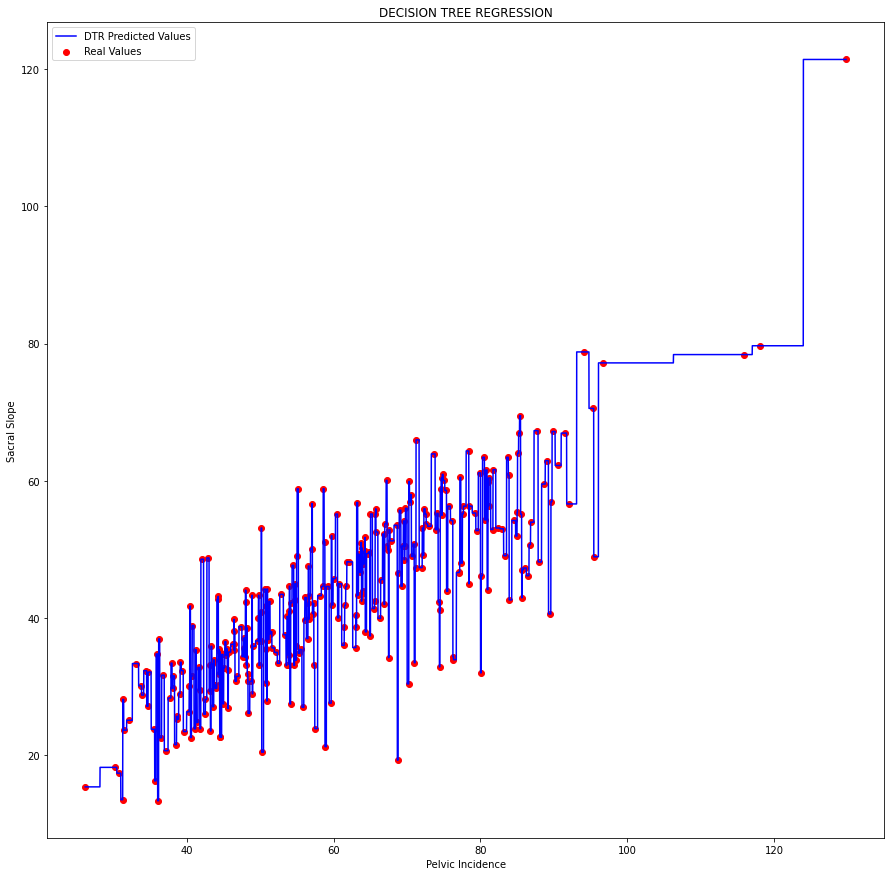

In [ ]:
#------------ DECISION TREE REGRESSION VISUALISATION ------------
plt.figure(figsize=[15,15])
plt.scatter(x,y,color="red",label="Real Values")
plt.plot(dtr_x,dtr_yhead,color="blue",label="DTR Predicted Values")
plt.title("DECISION TREE REGRESSION")
plt.xlabel("Pelvic Incidence")
plt.ylabel("Sacral Slope")
plt.legend()
plt.show()

In [ ]:
#------------ RANDOM FOREST REGRESSION ------------
from sklearn.ensemble import RandomForestRegressor
rfg_df=RandomForestRegressor(n_estimators=80,random_state=3)
rfg_df.fit(x,y)
rfg_x=np.arange(min(x),max(x),0.01).reshape(-1,1)
rfg_yhead=rfg_df.predict(rfg_x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


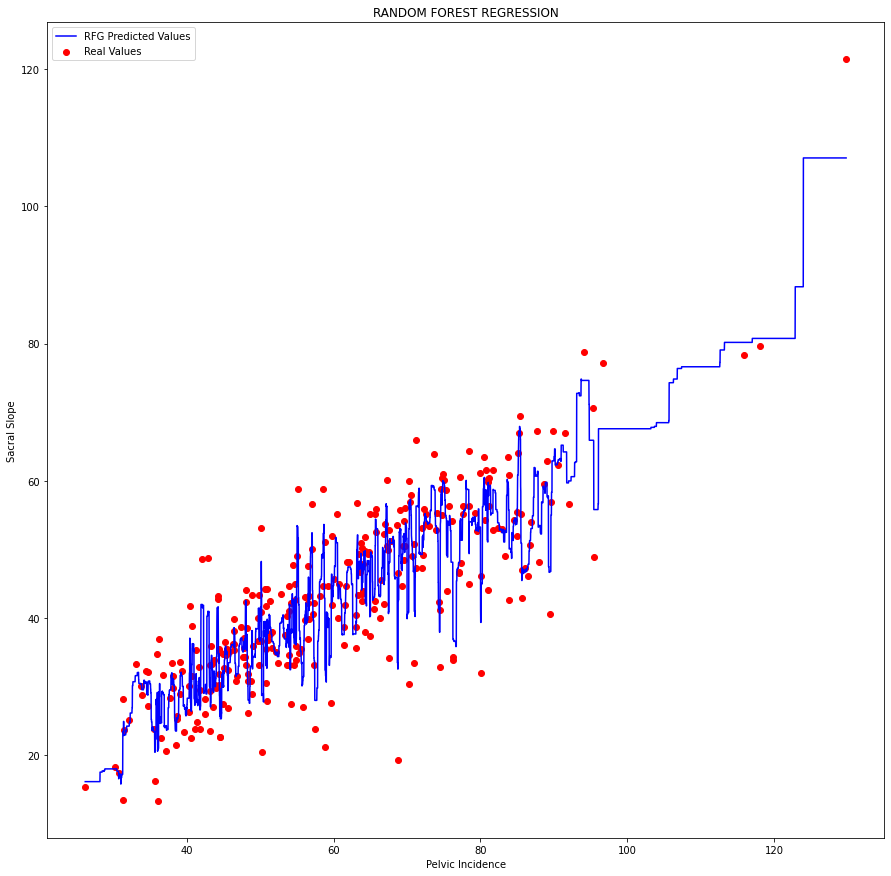

In [ ]:
#------------ RANDOM FOREST REGRESSION VISUALISATION ------------
plt.figure(figsize=[15,15])
plt.scatter(x,y,color="red",label="Real Values")
plt.plot(rfg_x,rfg_yhead,color="blue",label="RFG Predicted Values")
plt.title("RANDOM FOREST REGRESSION")
plt.xlabel("Pelvic Incidence")
plt.ylabel("Sacral Slope")
plt.legend()
plt.show()

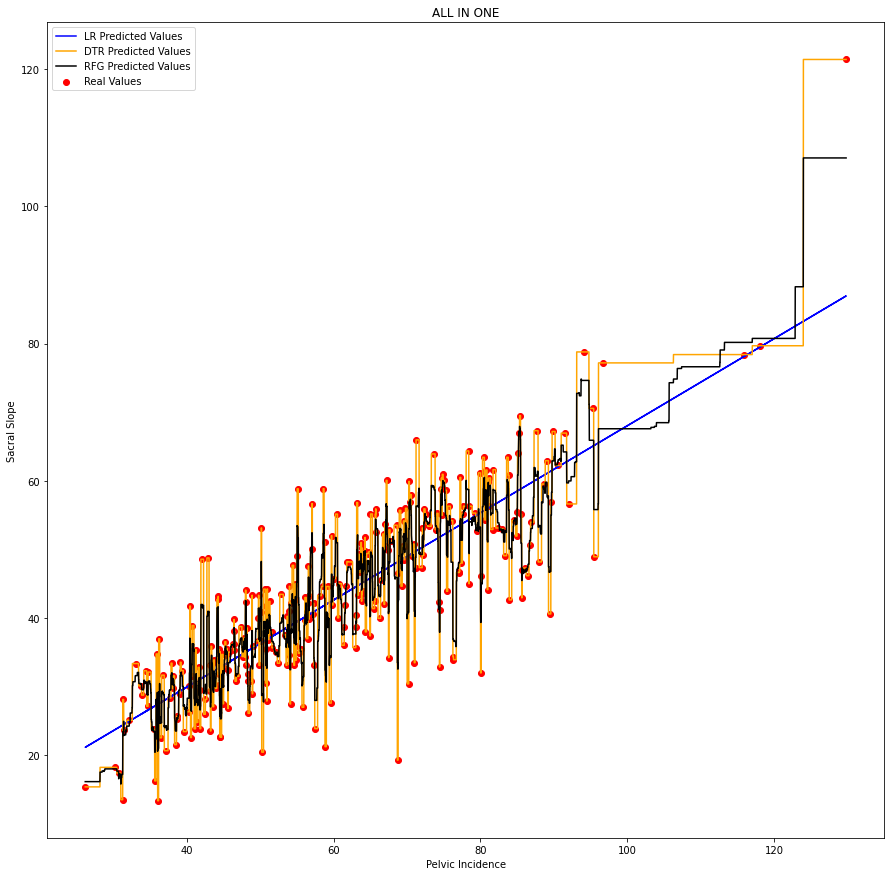

In [ ]:
#------------ VISUALISATION ------------
plt.figure(figsize=[15,15])
plt.scatter(x,y,color="red",label="Real Values")
plt.plot(x,lr_yhead,color="blue",label="LR Predicted Values")
#plt.plot(plr_x,plr_yhead,color="purple",label="PLR Predicted Values")
plt.plot(dtr_x,dtr_yhead,color="orange",label="DTR Predicted Values")
plt.plot(rfg_x,rfg_yhead,color="black",label="RFG Predicted Values")
plt.title("ALL IN ONE")
plt.xlabel("Pelvic Incidence")
plt.ylabel("Sacral Slope")
plt.legend()
plt.show()